<a href="https://colab.research.google.com/github/ffpaiki/ML-online-retail-2023/blob/main/ML_OnlineRetail_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
# z`!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#library
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/UNIPA (Private)/PhD/LECTURES/EECE 5644/FINAL PROJECT - MARKET BASKET ANALYSIS/Final Project 5644/Online Retail.csv',
                   dtype = {'InvoiceNo': str, 'StockCode': str, 'Description': str, 'Quantity': int, 'InvoiceDate': str, 'UnitPrice': float, 'CustomerID': str, 'Country': str})
#data = pd.read_excel('Online_Retail.xlsx')
data = pd.DataFrame(data)

data.shape
# data.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(541909, 8)

In [ ]:
# get rid of 'C' invoice data

data = data[data["InvoiceNo"].str.contains("C")==False]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

data.dropna(inplace = True)

#cleaning data
np.where(pd.isnull(data))
data.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(397924, 8)

# Exploratory Data Analysis

In [ ]:
#group by CustomerID and Invoice No to get total payment per invoice

byGroup = data[['CustomerID','InvoiceNo','Quantity','UnitPrice']].copy()
byGroup['TotalAmount'] = byGroup['UnitPrice'] * byGroup['Quantity']

byGroup2 = byGroup.groupby(['CustomerID'])['TotalAmount'].sum().reset_index()
dfShow= byGroup2.sort_values('TotalAmount',ascending=False).head(10)
dfShow.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,TotalAmount
1690,14646,280206.02
4202,18102,259657.30
3729,17450,194550.79
3009,16446,168472.50
1880,14911,143825.06


In [ ]:
#group by CustomerID to get know how many invoice per customer made

byGroup3 = byGroup.groupby(['CustomerID','InvoiceNo'])['TotalAmount'].sum().reset_index()
byGroup4 = byGroup3.groupby(['CustomerID']).count().reset_index()
byGroup4.sort_values('TotalAmount',ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CustomerID,InvoiceNo,TotalAmount
326,12748,210,210
1880,14911,201,201
4011,17841,124,124
562,13089,97,97
1662,14606,93,93


In [ ]:
#We can't always say that the more items purchased, the more your expenditure is.
#In here we show a data of to 10 customer yang melakukan transaksi yang tinggi

import plotly.express as px
import pandas as pd


fig = px.bar(dfShow, x='CustomerID', y='TotalAmount',
             labels={
                "CustomerID": "Customer ID",
                "sum": "Total Consumer Spending"})
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#the top 10 based on how many invoice has been made
dfShow2 = byGroup4.sort_values('TotalAmount',ascending=False).head(10)
dfShow2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,InvoiceNo,TotalAmount
326,12748,210,210
1880,14911,201,201
4011,17841,124,124
562,13089,97,97
1662,14606,93,93
2177,15311,91,91
481,12971,86,86
1690,14646,74,74
2703,16029,63,63
796,13408,62,62


In [ ]:
import plotly.express as px
import pandas as pd


fig = px.bar(dfShow2, x='CustomerID', y='TotalAmount',
             labels={
                "CustomerID": "Customer ID",
                "sum": "Total Invoice Made"})
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#visualization for showing monthly total spending and
#the peak hours activity based on the total invoice made

#change data format
data['InvDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%y %H:%M')
data['Year'] = data['InvDate'].dt.year

# Create a new column for month
data['Month'] = data['InvDate'].dt.month

data["Hour"] = data["InvDate"].dt.hour
data["Day"] = data["InvDate"].dt.dayofyear


# Create a new column for quarter
data['Quarter'] = data['Month'].apply(lambda x: 1 if x >= 1 and x <= 3 else (2 if x >= 4 and x <= 6 else (3 if x >= 7 and x <= 9 else 4)))

data.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvDate,Year,Month,Hour,Day,Quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4


In [ ]:
#download data
data.to_csv('data1.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:

dataGroup2 = data
dataGroup2['TotalAmount'] = dataGroup2['UnitPrice'] * dataGroup2['Quantity']

dataGroup2 = dataGroup2.groupby(['Month'],as_index=False)['TotalAmount'].agg('sum')
dataGroup2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Month,TotalAmount
0,1,569445.040
1,2,447137.350
2,3,595500.760
3,4,469200.361
4,5,678594.560
5,6,661213.690
6,7,600091.011
7,8,645343.900
8,9,952838.382
9,10,1039318.790


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



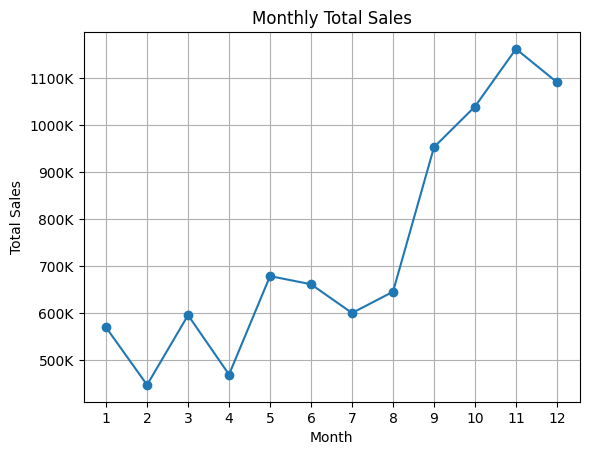

In [ ]:
# plot the data between the total sales and total customer at a certain month
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_thousands(x, pos):
    return f'{x / 1000:.0f}K'

def generate_line_graph_with_dots(x_data, y_data, a,b,t):
    # Plot the line
    plt.plot(x_data, y_data, marker='o', linestyle='-')

    formatter = FuncFormatter(format_thousands)
    plt.gca().yaxis.set_major_formatter(formatter)

    plt.xticks(np.arange(1,13,step=1))
    # Add labels and title
    plt.grid(True)
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)

    # Show the plot
    plt.show()

generate_line_graph_with_dots(dataGroup2['Month'],dataGroup2['TotalAmount'],'Month','Total Sales', 'Monthly Total Sales')



In [ ]:
#Total item sold per month

dataGroup3 = data

dgMonth = dataGroup3.groupby(['Month'],as_index=False)['Quantity'].agg('sum')
dgMonth

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Month,Quantity
0,1,349147
1,2,265638
2,3,348544
3,4,292225
4,5,373685
5,6,363699
6,7,369432
7,8,398938
8,9,544899
9,10,593908


In [ ]:
fig = px.bar(dgMonth, x='Month', y='Quantity',color_discrete_sequence=['green'],
             labels={
                "Month": "Month",
                "Quantity": "Total Item Sold"})

fig.update_xaxes(tickvals=dgMonth['Month'], ticktext=dgMonth['Month'])

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#heat map to know where is the busy hour each daya based on total sales

dgHour = data
dgHour['TotalAmount'] = dgHour['UnitPrice'] * dgHour['Quantity']

dgHour2 = dgHour.groupby(['Month','Hour'],as_index=False)['TotalAmount'].agg('sum')
dgHour2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Month,Hour,TotalAmount
0,1,7,234.00
1,1,8,18812.11
2,1,9,38605.01
3,1,10,128978.59
4,1,11,72701.43
...,...,...,...
158,12,16,85427.51
159,12,17,36391.47
160,12,18,21081.15
161,12,19,6526.62


## Heat Map Hours vs Month

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



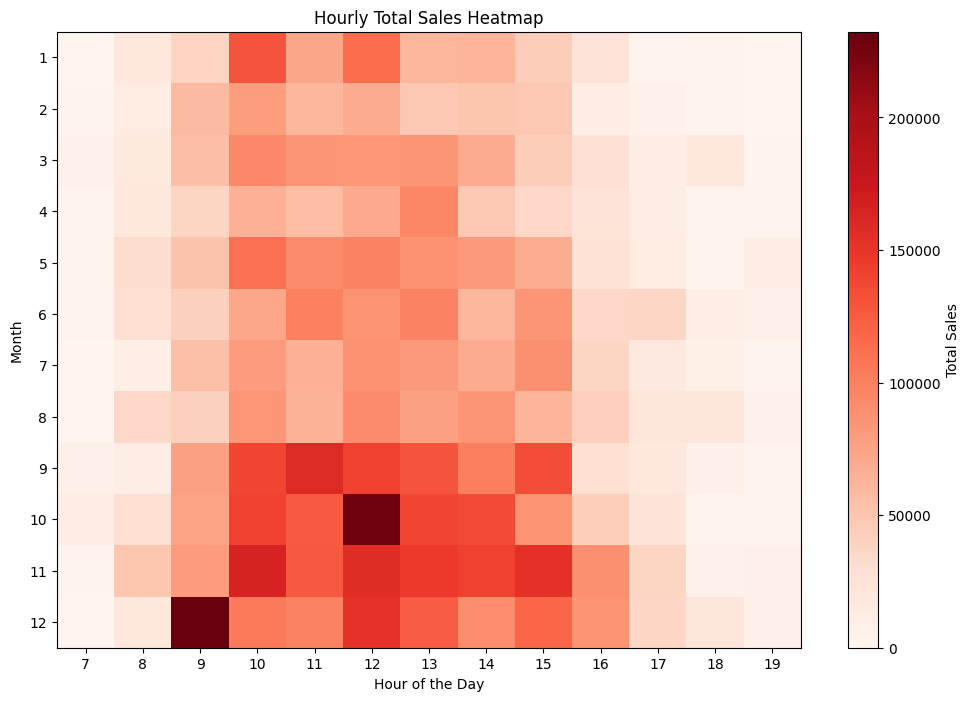

In [ ]:
#generate a heat map for each hour and each month

common_hours = dgHour2.groupby('Month')['Hour'].unique().apply(set).min()

# Filter the DataFrame to include only the common range of hours
df = dgHour2[dgHour2['Hour'].isin(common_hours)]

# Pivot the DataFrame to create a 2D grid for the heatmap
pivot_df = df.pivot_table(index='Month', columns='Hour', values='TotalAmount', fill_value=0)

# Create a heatmap using Matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(pivot_df, cmap='Reds', aspect='auto', origin='upper')

# Set the labels and ticks
plt.xticks(np.arange(len(common_hours)), common_hours)
plt.yticks(np.arange(len(pivot_df.index)), pivot_df.index)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Total Sales')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Month')
plt.title('Hourly Total Sales Heatmap')

plt.show()

In [ ]:
def generate_line_graph_with_dotsH(x_data, y_data, a,b,t):
    # Plot the line
    plt.plot(x_data, y_data, marker='o', linestyle='-',color = 'yellow')

    # Display values for each data point
    for x, y in zip(x_data, y_data):
        plt.text(x, y, f'({y})', ha='left', va='bottom')

    plt.xticks(np.arange(6,21,step=1))
    # Add labels and title
    plt.xlabel(a)
    plt.ylabel(b)
    plt.title(t)

    # Show the plot
    plt.show()

# generate_line_graph_with_dotsH(gpHour['Hour'],gpHour['sum'],'Hour','Total Sales', 'Hourly Total Sales')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#how much item they sell this year

dgItemYear = data.groupby(['Description'],as_index=False).count()
dgItemYear.shape


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



(3877, 15)

In [ ]:
#group by data based item, q: item most frequenctly purchased

dgItem = data.groupby(['Description'],as_index=False)['Quantity'].agg('sum')

dgItem.sort_values('Quantity',ascending =False).head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
1762,JUMBO BAG RED RETROSPOT,46181
3698,WHITE HANGING HEART T-LIGHT HOLDER,36725
216,ASSORTED COLOUR BIRD ORNAMENT,35362
2269,PACK OF 72 RETROSPOT CAKE CASES,33693
2600,POPCORN HOLDER,30931
2656,RABBIT NIGHT LIGHT,27202
2047,MINI PAINT SET VINTAGE,26076


In [ ]:
#Purchased Frequency

dataPF = data[['CustomerID', 'InvoiceNo','InvoiceDate','Quantity','Hour','Month','Year']].copy()

dataPF['InDate'] = pd.to_datetime(dataPF['InvoiceDate'])
dataPF.head(2)

total_quantity_per_customer = dataPF.groupby('CustomerID')['Quantity'].sum().reset_index()

total_invoices_per_customer = dataPF.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

customer_data = pd.merge(total_quantity_per_customer, total_invoices_per_customer, on='CustomerID', how='inner')

customer_data['PurchaseFrequency'] = customer_data['Quantity'] / customer_data['InvoiceNo']
customer_data.head(5)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,CustomerID,Quantity,InvoiceNo,PurchaseFrequency
0,12346,74215,1,74215.000000
1,12347,2458,7,351.142857
2,12348,2341,4,585.250000
3,12349,631,1,631.000000
4,12350,197,1,197.000000


In [ ]:
#Data Modelling

dataModel = pd.crosstab(data['CustomerID'], data['Description'])
dataModel.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# #standarize the data
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

# feature = groupByInv[['sum','count']]
# feature_scaled = StandardScaler().fit_transform(feature)

# ks = range(1,12)
# inertias = []

# #generating the suitable number cluster using elbow
# for k in ks:
#   model = KMeans(n_clusters = k)
#   model.fit(feature_scaled)
#   inertias.append(model.inertia_)

# plt.plot(ks, inertias, '-o', color='black')
# plt.xlabel('number of cluster k')
# plt.ylabel('inertia')
# plt.grid(True)
# plt.xticks(ks)
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# #applying k-means
# #number of chosen cluster between 6 or 7
# kmeans = KMeans(n_clusters =6, random_state=42)

# groupByInv['Cluster'] = kmeans.fit_predict(feature_scaled)

# # 1. Examine Cluster Centers
# kmeans_centers = kmeans.cluster_centers_
# print("Cluster Centers:")
# print(kmeans_centers)

# # 2. Analyze Cluster Characteristics
# groupByInv['Cluster'] = kmeans.labels_
# cluster_summary = groupByInv.groupby('Cluster').mean()
# print("\nCluster Characteristics:")
# print(cluster_summary)

# plt.scatter(feature_scaled[:, 0], feature_scaled[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
# plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
# plt.title('K-means Clustering Results')
# plt.xlabel('Total Spending (Scaled)')
# plt.ylabel('Purchase Frequency (Scaled)')
# plt.legend()
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
#another way to implement the elbow method without standarization

# X = dataModel.values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# data.head()

# print(data["Country"].nunique)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# #Implement Elbow Method
# from sklearn.cluster import KMeans

# ks = range(1,15)
# inertias = []

# for k in ks:
#   model = KMeans(n_clusters = k)
#   model.fit(X)
#   inertias.append(model.inertia_)

# plt.plot(ks, inertias, '-o', color='black')
# plt.xlabel('number of cluster k')
# plt.ylabel('inertia')
# plt.xticks(ks)
# plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
# kmeans_centers = ks.cluster_centers_
# print("Cluster Centers:")
# print(kmeans_centers)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Apriori Algorithm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Linear Regression

In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvDate,Year,Month,Hour,Day,Quarter,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,2010-12-01 08:26:00,2010,12,8,335,4,20.34


In [ ]:
x_all = data[['StockCode', 'Description', 'Quantity', 'CustomerID','Day','Month','Hour','Quarter']]
y_all = data[["TotalAmount"]]

X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.3 ,random_state=0)

X_train.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



NameError: name 'train_test_split' is not defined

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['Quantity']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train["StockCode"] = X_train["StockCode"].astype('category')
X_train["StockCode"] = X_train["StockCode"].cat.codes
X_train["Description"] = X_train["Description"].astype('category')
X_train["Description"] = X_train["Description"].cat.codes
X_train["CustomerID"] = X_train["CustomerID"].astype('category')
X_train["CustomerID"] = X_train["CustomerID"].cat.codes

from sklearn import preprocessing

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y_train)

# X_train.info()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[5.6, 4])

from yellowbrick.model_selection import RFECV

visualizer = RFECV(estimator, step=1, cv=5,
                   scoring='neg_mean_squared_error')

visualizer.fit(X, y)
visualizer.show()